In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [107]:
df=pd.read_csv("restaurant_data.csv")
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [109]:
df.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

In [110]:
df['Total_Reservations'] = df['Weekend Reservations'] + df['Weekday Reservations']
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue,Total_Reservations
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52,17
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83,54
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62,41
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80,26
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35,63


In [112]:
ohe=OneHotEncoder(sparse_output=False,drop='first')
encoded_features = ohe.fit_transform(df[['Location', 'Cuisine', 'Parking Availability']])
feature_names = ohe.get_feature_names_out(['Location', 'Cuisine', 'Parking Availability'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)
df.drop(['Location', 'Cuisine', 'Parking Availability'], axis=1, inplace=True)
df = pd.concat([df, encoded_df], axis=1)
df

,Name,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,...,Revenue,Total_Reservations,Location_Rural,Location_Suburban,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_Yes
0,Restaurant 0,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,...,638945.52,17,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,Restaurant 1,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,...,490207.83,54,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,Restaurant 2,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,...,541368.62,41,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Restaurant 3,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,...,404556.80,26,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Restaurant 4,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,...,1491046.35,63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,...,434653.45,37,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8364,Restaurant 8364,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,...,414977.92,58,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8365,Restaurant 8365,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,...,930395.87,104,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8366,Restaurant 8366,3.1,31,44.53,707,7170,1,729,178.482851,6.1,...,311493.48,27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\NIKITA\AppData\Local\Temp\ipykernel_6732\2710104065.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

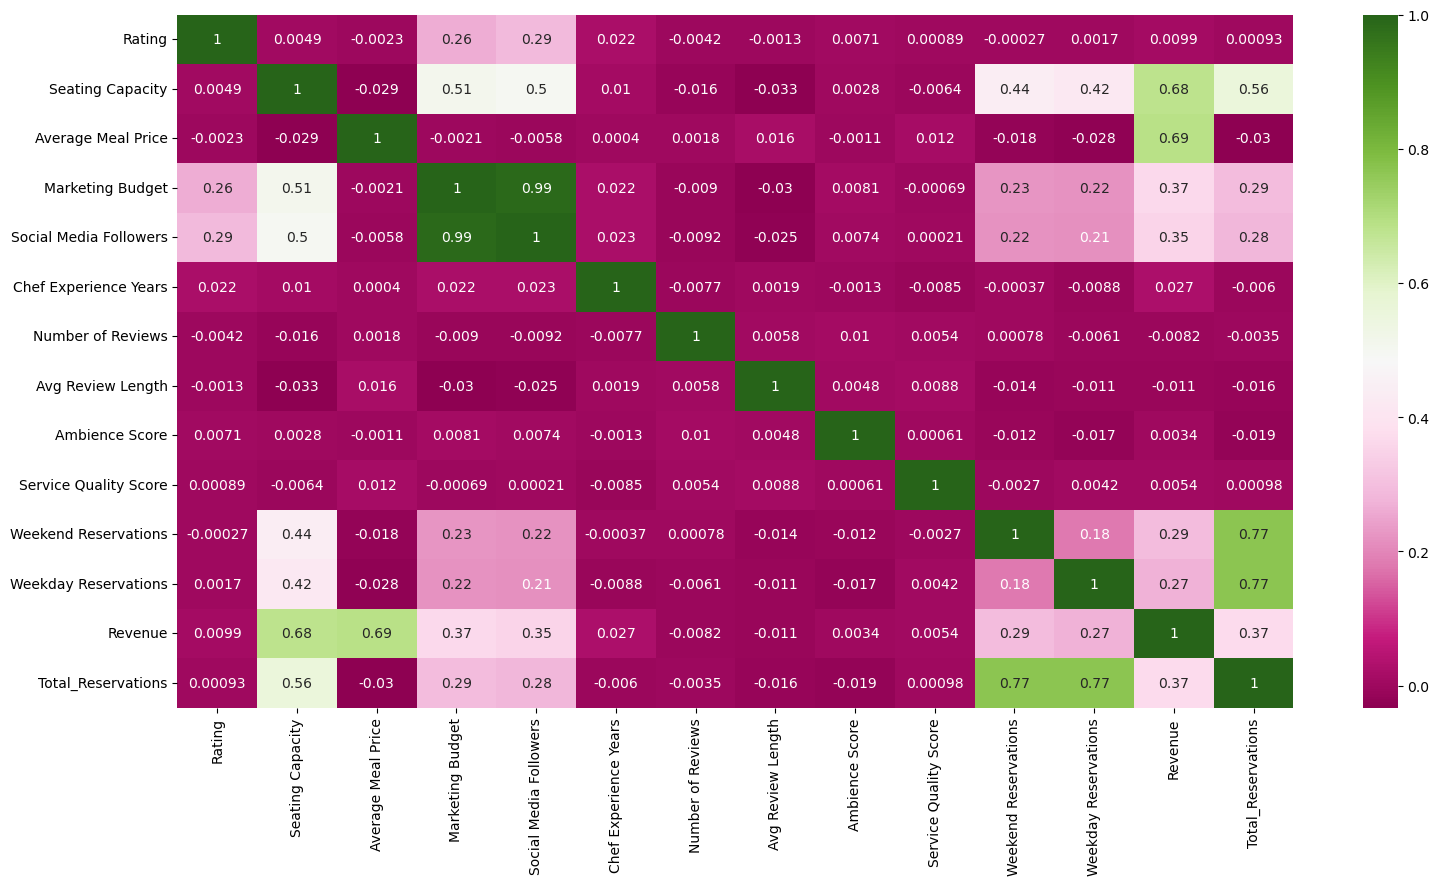

In [111]:
correlation=df.corr()
plt.figure(figsize=(18, 9))
sns.heatmap(correlation,cmap='PiYG',annot=True)

#### Key insights
- There is strong correlation between **Seating Capactity**(0.68) and **Average Meal Price**(0.69) with **Revenue**.
- There is moderate correlation between **Marketing Budget Social** and **Media Followers** with **Revenue**.
- There is very strong correlation between **Marketing Budget Social** (0.99) with **Media Followers**.
- There us a strong correlation between **Seating Capactity**(0.56) and **Total reservation**

We can summarize that Revenue generation is dependent upon the seating capacity and the meal price of the restaurant.Higher marketing budgets tend to lead to more social media followers,hence increasing the popularity of restaurant.Restaurant with more seating capacity will experience more reservation.

In [113]:
df.drop(['Name','Chef Experience Years', 'Number of Reviews', 'Avg Review Length','Ambience Score', 'Service Quality Score'],axis=1,inplace=True)


In [114]:
df.head()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Weekend Reservations,Weekday Reservations,Revenue,Total_Reservations,Location_Rural,Location_Suburban,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_Yes
0,4.0,38,73.98,2224,23406,13,4,638945.52,17,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,3.2,76,28.11,4416,42741,48,6,490207.83,54,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,4.7,48,48.29,2796,37285,27,14,541368.62,41,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.4,34,51.55,1167,15214,9,17,404556.80,26,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,4.9,88,75.98,3639,40171,37,26,1491046.35,63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Data visualization

[]

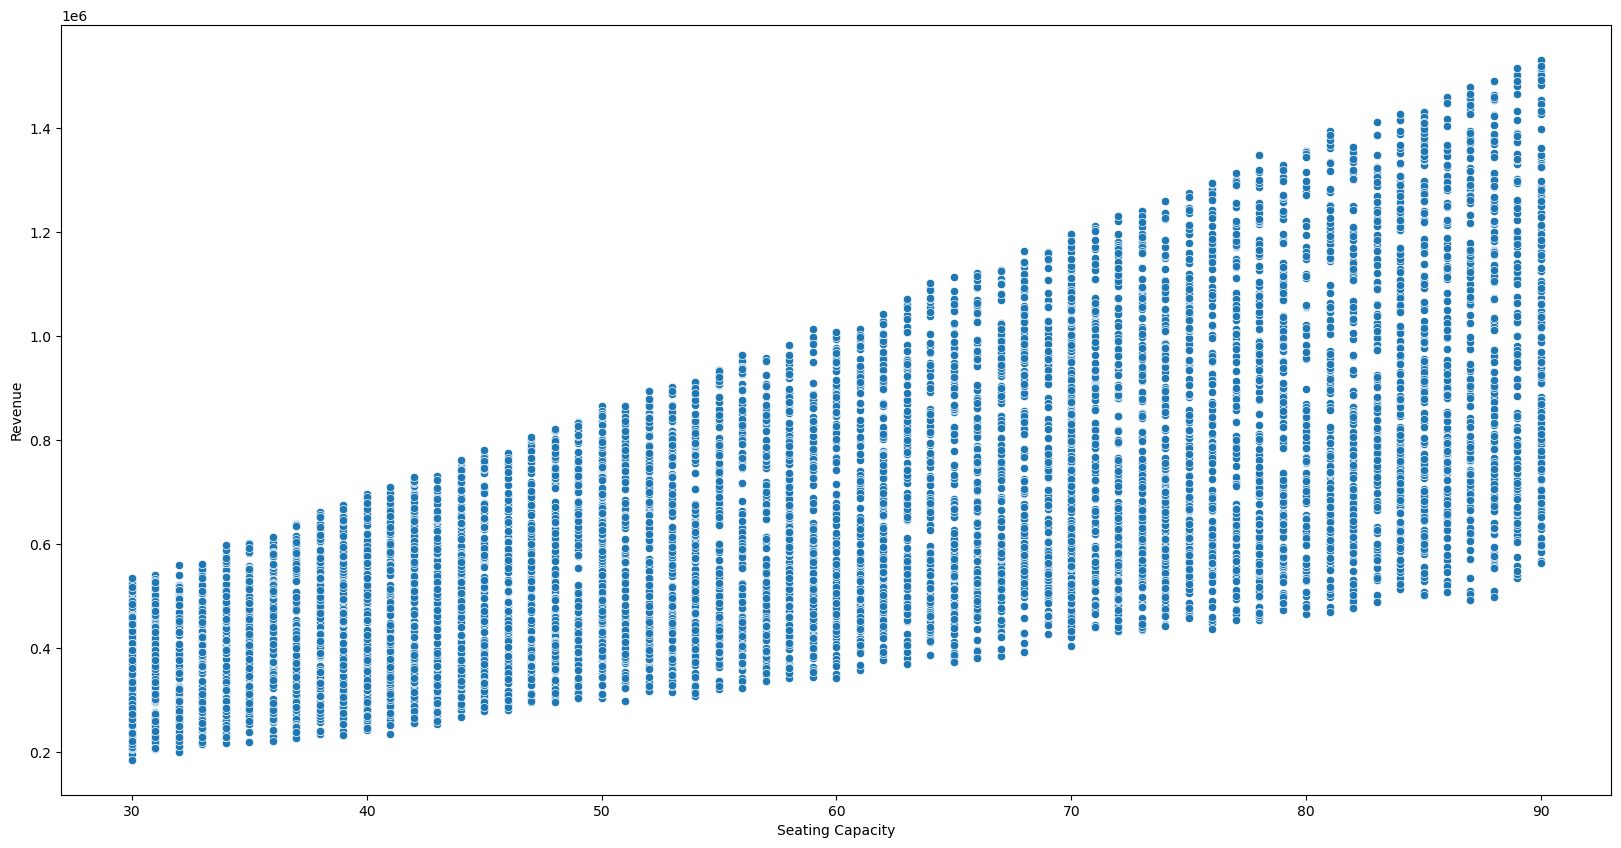

In [115]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Seating Capacity', y='Revenue', data=df)
plt.plot()

**Positive Correlation**: There is a clear positive correlation between seating capacity and revenue. As the seating capacity increases, the revenue also tends to increase. This suggests that restaurants with larger seating capacities tend to generate higher revenue.



In [99]:
bin_edges = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
bin_labels = ['25-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76+']
df['Meal Price Bin'] = pd.cut(df['Average Meal Price'], bins=bin_edges, labels=bin_labels,include_lowest=True)
# print(df[['Average Meal Price', 'Meal Price Bin']].head())
bin_data=df.groupby('Meal Price Bin')['Revenue'].mean().reset_index()
bin_data

,Meal Price Bin,Revenue
0,25-30,3.914807e+05
1,31-35,4.502630e+05
2,36-40,5.272381e+05
3,41-45,5.875188e+05
4,46-50,6.577371e+05
5,51-55,7.131162e+05
6,56-60,7.717290e+05
7,61-65,8.563049e+05
8,66-70,8.832547e+05
9,71-75,9.659862e+05


[]

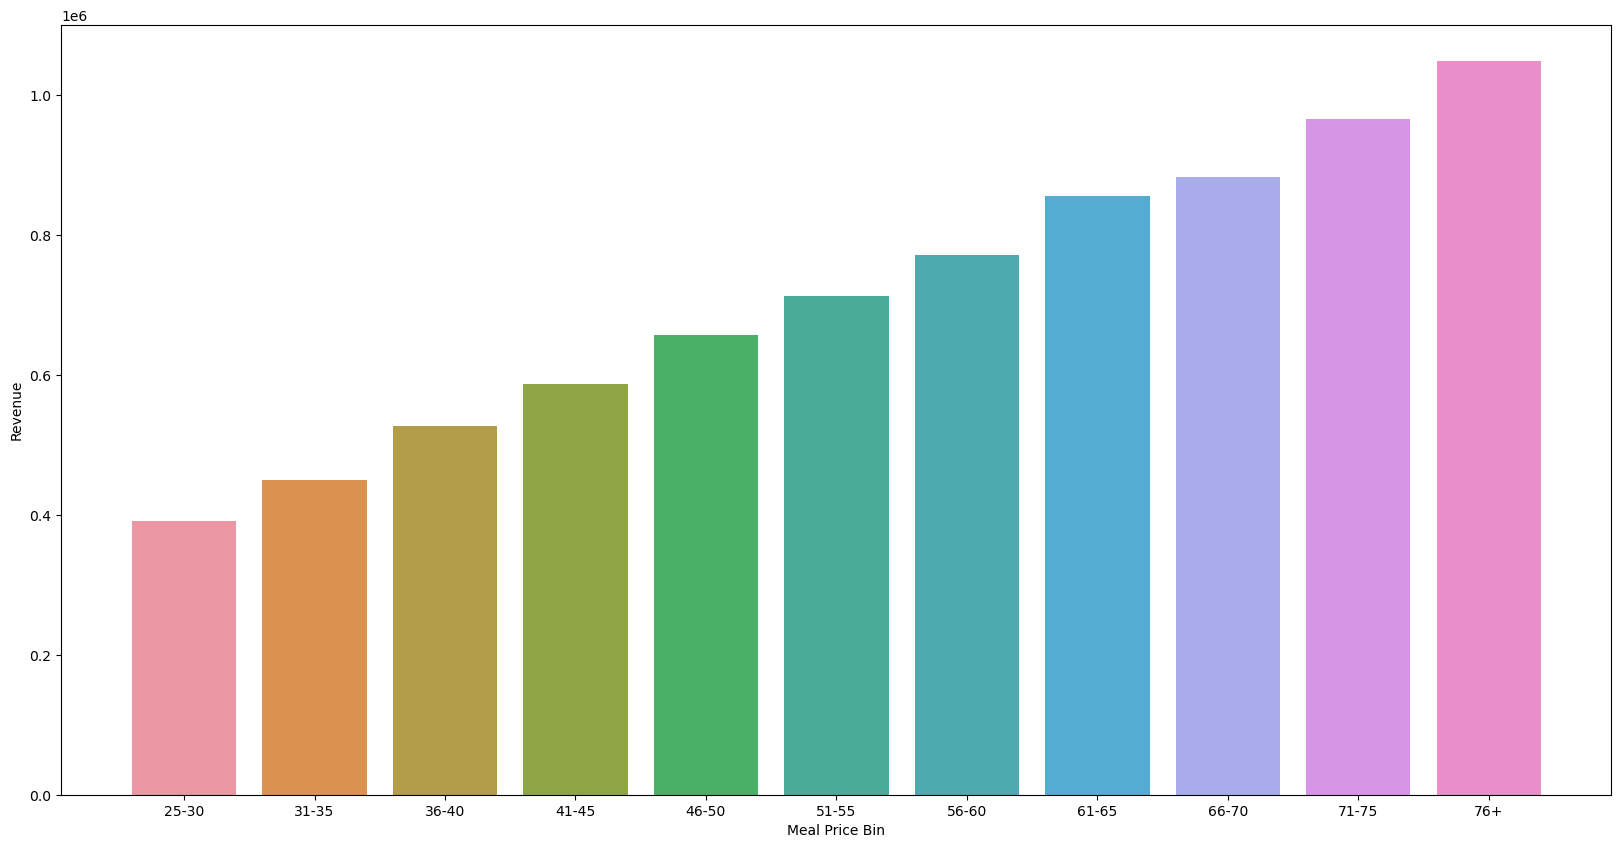

In [100]:
plt.figure(figsize=(20,10))
sns.barplot(x='Meal Price Bin', y='Revenue', data=bin_data)
plt.plot()

**High Revenue for High Prices**: The bin with the highest average meal price (75-80) shows the highest revenue. This indicates that restaurants with higher meal prices tend to generate more revenue.

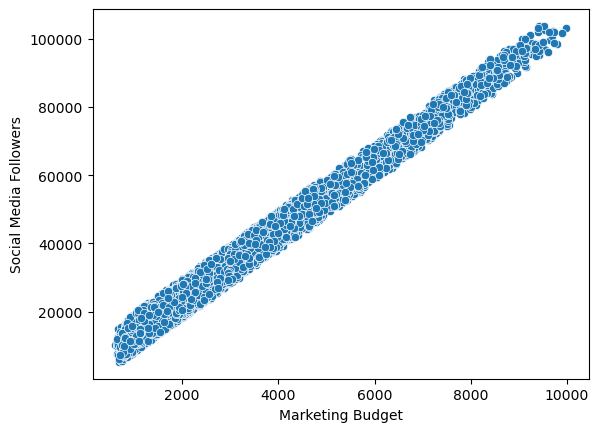

In [101]:
sns.scatterplot(x='Marketing Budget',y='Social Media Followers',data=df)
plt.show()

**Positive Correlation**: Social media followers and marketing budget shows a linear positive correlation. With increase in marketing budget with social media followers also increases 

In [102]:
bin_edges=['30','40','50','60','70','80','90','100']
bin_labels=['30-40','41-50','51-60','61-70','71-80','81-90','91-100']
df['seating bins']=pd.cut(df['Seating Capacity'], bins=bin_edges, labels=bin_labels,include_lowest=True)
# print(df[['Seating Capacity', 'seating bins']].head())
bin_data=df.groupby('seating bins')['Total_Reservations'].mean().reset_index()
bin_data


C:\Users\NIKITA\anaconda3\Lib\site-packages\pandas\core\reshape\tile.py:431: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ids[np.asarray(x) == bins[0]] = 1


,seating bins,Total_Reservations
0,30-40,34.255651
1,41-50,44.966461
2,51-60,54.695941
3,61-70,63.204067
4,71-80,73.824405
5,81-90,83.689988
6,91-100,NaN


[]

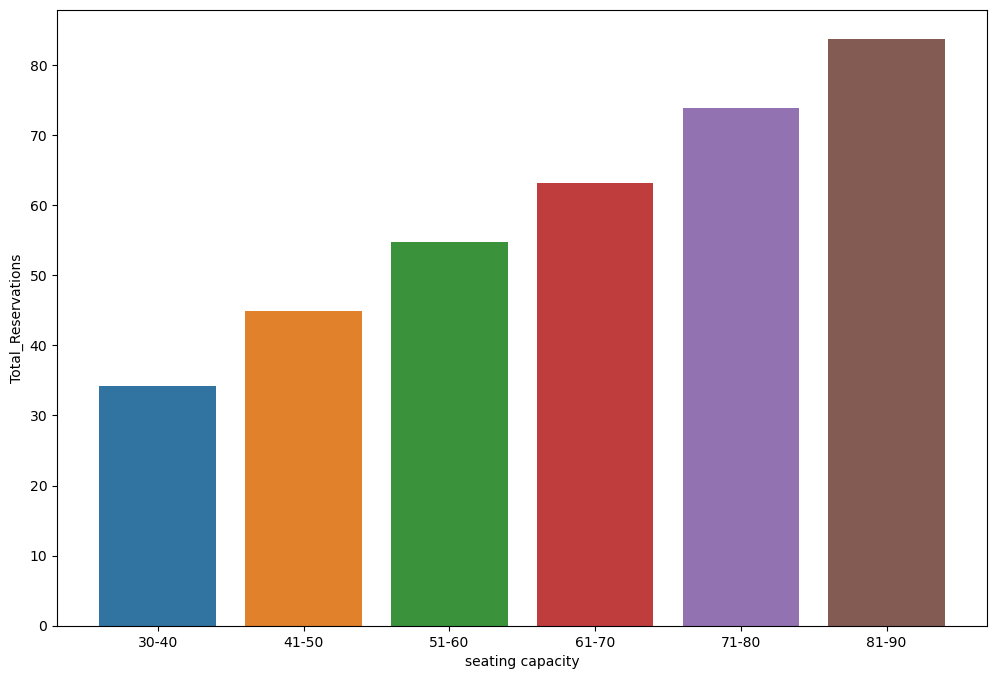

In [103]:
plt.figure(figsize=(12,8))
sns.barplot(x='seating bins', y='Total_Reservations', data=bin_data)
plt.xlabel("seating capacity")
plt.plot()

This visualization suggests that more the seating capacity more is the reservation in the restaurant.

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [118]:
y_pred=model.predict(X_test)
score = model.score(X_test, y_test)
print(f'Score: {score}')

Score: 0.999101920932943
